In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
tita=pd.read_csv("/content/drive/MyDrive/titanic.csv")
tita.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
tita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
tita.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

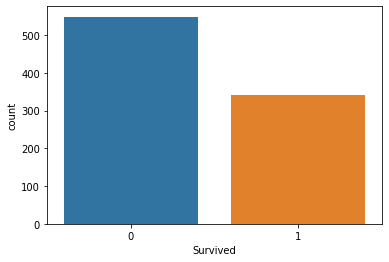

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="Survived",data=tita)

In [ ]:
tita.value_counts(tita.Survived)

Survived
0    549
1    342
dtype: int64

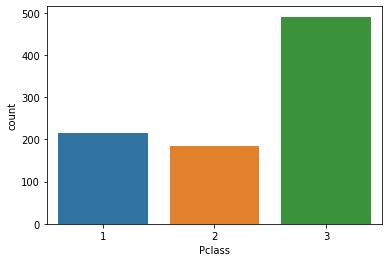

In [ ]:
sns.countplot(x="Pclass",data=tita)

In [ ]:
tita.value_counts(tita.Pclass)

Pclass
3    491
1    216
2    184
dtype: int64

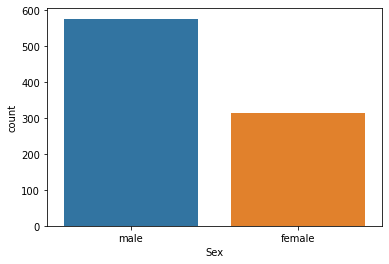

In [ ]:
sns.countplot(x="Sex",data=tita)

In [ ]:
tita.value_counts(tita.Sex)

Sex
male      577
female    314
dtype: int64

In [ ]:
tita.Age.fillna(tita.Age.median(),inplace=True)

In [ ]:
tita.Age.isnull().sum()

0

In [ ]:
tita.drop(["PassengerId","Pclass","Name","Sex","SibSp","Parch","Ticket","Cabin","Embarked"], axis = 1, inplace = True)

In [ ]:
Y=tita.Survived
X=tita[['Age','Fare']]


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(xtrain,ytrain)
model.score(xtrain,ytrain)

0.6671348314606742

In [ ]:
predicted=model.predict(xtest)

In [ ]:
from sklearn import metrics
confmat=metrics.confusion_matrix(ytest,predicted)
print(confmat)

[[97  7]
 [61 14]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier().fit(xtrain,ytrain)
model.score(xtest,ytest)

0.6312849162011173

In [ ]:
model.score(xtrain,ytrain)


0.9536516853932584

In [ ]:
from sklearn.svm import SVC
svc_model=SVC(kernel="linear")
svc_model.fit(xtrain,ytrain)

SVC(kernel='linear')

In [ ]:
prediction=svc_model.predict(xtest)
svc_model.score(xtest,ytest)

0.6201117318435754

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=21,metric="minkowski",p=2)
classifier.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=21)

In [ ]:
prediction=classifier.predict(xtest)
classifier.score(xtest,ytest)

0.659217877094972

In [ ]:
n=int(input("Enter the value of n:"))
classifier= KNeighborsClassifier(n_neighbors=n,metric="minkowski",p=2)
classifier.fit(xtrain,ytrain)
prediction=classifier.predict(xtest)
classifier.score(xtest,ytest)


Enter the value of n:24


0.6815642458100558

In [ ]:
a=[]
for i in range(1,445):
  classifier= KNeighborsClassifier(n_neighbors=i,metric="minkowski",p=2)
  classifier.fit(xtrain,ytrain)
  prediction=classifier.predict(xtest)
  score=classifier.score(xtest,ytest)
  a.append(score)
#print(a)
print((a.index(max(a))+1))





24


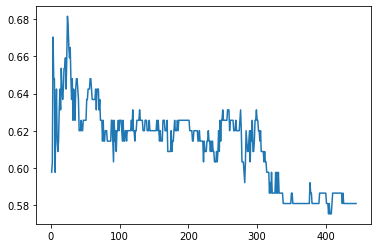

In [ ]:
plt.plot(range(1,445),a)